# Installing Required Packages


In [ ]:
pip install top2vec[sentence_encoders]

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 7.1 MB/s 
     |████████████████████████████████| 5.9 MB 33.8 MB/s 
     |████████████████████████████████| 1.1 MB 68.3 MB/s 
     |████████████████████████████████| 578.0 MB 15 kB/s 
INFO: pip is looking at multiple versions of tensorflow-text to determine which version is compatible with other requirements. This could take a while.
     |████████████████████████████████| 4.6 MB 61.1 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340718 sha256=bd54e5a4e9d754737eb65f3f3d74bd55c8fdc854df889a9e262d7ed88d55816d
  Stored in directory: /root/.cache/pip/wheels/93/78/2e/03ee191669a772e9653260aa3bd53e0b1a768751a9676e8c82
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=e5fd48e7a2059a5c382a30747059111ad52f3a2f9704692a3a13739d4644116a
  S

In [ ]:
pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 26.0 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


# Import Packages

In [ ]:
from zipfile import ZipFile
import pandas as pd
from  top2vec import Top2Vec
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from gensim.models.ldamodel import LdaModel

# Extract Dataset from Zip File

In [ ]:
path = '/content/drive/MyDrive/amazon_reviews_books.tsv.zip'

zf = ZipFile(path)

zf.extractall()

# Ingest Dataset Into DataFrame

In [ ]:
with pd.read_csv('/content/amazon_reviews_us_Books_v1_02.tsv', 
                 chunksize=10000, 
                 nrows = 100000,
                 sep='\\t' , 
                 usecols=['product_title','product_parent','review_headline','review_body','review_date','star_rating'],
                 ) as reader:
    
    df_small = pd.DataFrame()
    for chunk in reader:
      df_small = pd.concat([df_small, chunk])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
print(df_small.shape)
df_small.head()

(100000, 6)


,product_parent,product_title,star_rating,review_headline,review_body,review_date
0,122662979,Sisterhood of the Traveling Pants (Book 1),4,this book was a great learning novel!,this boook was a great one that you could lear...,2005-10-14
1,56191234,The Bad Girl's Guide to Getting What You Want,3,Fun Fluff,If you are looking for something to stimulate ...,2005-10-14
2,253182049,"Eisenhorn (A Warhammer 40,000 Omnibus)",4,this isn't a review,never read it-a young relative idicated he lik...,2005-10-14
3,348672532,Colby Conspiracy (Colby Agency),5,fine author on her A-game,Though she is honored to be Chicago Woman of t...,2005-10-14
4,598678717,The Psychology of Proof: Deductive Reasoning i...,4,Execellent cursor examination,Review based on a cursory examination by Unive...,2005-10-14


In [ ]:
df_small.to_csv('/content/drive/MyDrive/models/amazon_reviews_books.csv',
                columns=['product_title','product_parent','review_headline','review_body','review_date','star_rating'])

# Explore Metadata

In [ ]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   product_parent   100000 non-null  int64 
 1   product_title    100000 non-null  object
 2   star_rating      100000 non-null  int64 
 3   review_headline  99992 non-null   object
 4   review_body      100000 non-null  object
 5   review_date      100000 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.6+ MB


## Check for missing data

In [ ]:
df_small.isnull().sum()

product_parent     0
product_title      0
star_rating        0
review_headline    8
review_body        0
review_date        0
dtype: int64

## Descriptive Stats

In [ ]:
df_small.describe()

,product_parent,star_rating
count,1.000000e+05,100000.000000
mean,4.947999e+08,4.196720
std,2.892070e+08,1.221743
min,6.430000e+03,1.000000
25%,2.404550e+08,4.000000
50%,4.889281e+08,5.000000
75%,7.460972e+08,5.000000
max,9.999940e+08,5.000000


Number of Unique Books

In [ ]:
books = df_small["product_title"]
books.unique().shape

(62334,)

Popular/Unpopular Books

<BarContainer object of 10 artists>

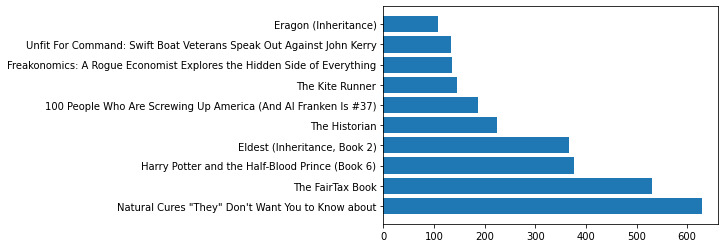

In [ ]:
data = books.value_counts()[:10]
plt.barh(y = data.index, width = data.values)

<BarContainer object of 10 artists>

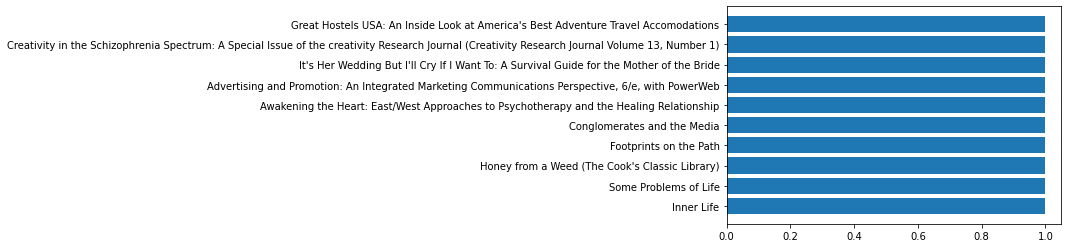

In [ ]:
data = books.value_counts()[-10:]
plt.barh(y = data.index, width = data.values)

# Top2Vec Model

## Training

In [ ]:
book_reviews = df_small['review_body']

In [ ]:
model = Top2Vec(books_reviews.values, ngram_vocab=True, embedding_model='universal-sentence-encoder',workers=10000)

2022-11-11 12:03:59,781 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-11-11 12:04:07,954 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-11-11 12:04:19,381 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-11-11 12:04:53,246 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/umap/spectral.py:209: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is

## Save/Load Model

In [ ]:
model = model.save("/content/drive/MyDrive/models/book_recomm_model")

In [ ]:
model = Top2Vec.load("/content/drive/MyDrive/models/book_recomm_model")

## Explore Model

In [ ]:
model.get_num_topics()


281

In [ ]:
model.get_topic_sizes()

(array([3404, 2711, 2697, 2669, 2606, 2325, 2313, 2195, 1650, 1631, 1434,
        1406, 1383, 1363, 1305, 1299, 1210, 1092, 1041, 1032, 1020,  991,
         989,  989,  966,  947,  900,  897,  874,  831,  825,  824,  816,
         778,  763,  757,  751,  737,  731,  680,  677,  665,  638,  631,
         605,  597,  577,  574,  571,  564,  533,  532,  529,  522,  520,
         513,  496,  477,  474,  473,  472,  462,  458,  451,  449,  441,
         436,  427,  423,  411,  409,  406,  383,  377,  376,  376,  364,
         364,  351,  346,  336,  323,  321,  316,  310,  306,  305,  302,
         298,  295,  294,  286,  283,  277,  273,  270,  266,  260,  259,
         258,  256,  253,  252,  252,  249,  245,  242,  238,  237,  236,
         234,  230,  226,  225,  225,  220,  220,  213,  207,  204,  202,
         202,  202,  198,  197,  195,  194,  194,  194,  191,  186,  186,
         183,  183,  179,  179,  179,  170,  167,  162,  161,  161,  161,
         160,  160,  159,  157,  155, 

### Word Clouds

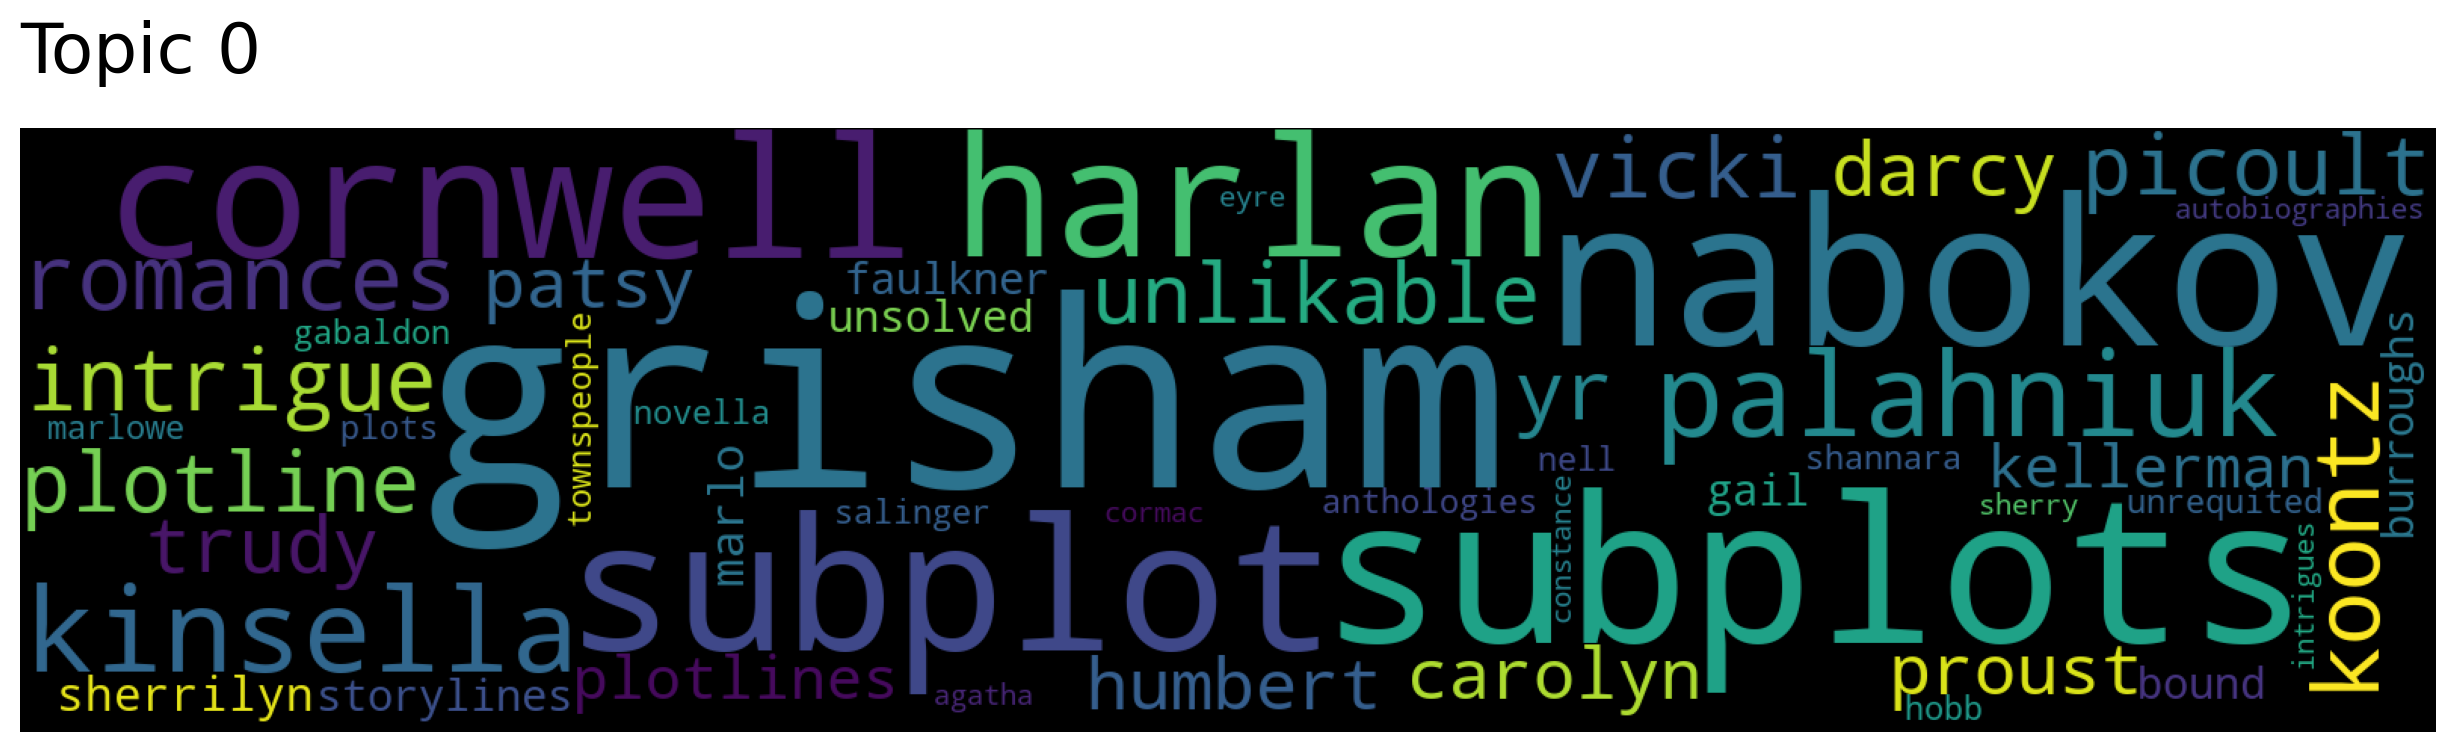

In [ ]:
model.generate_topic_wordcloud(0)


In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(6)
print(topic_words)
print(word_scores)


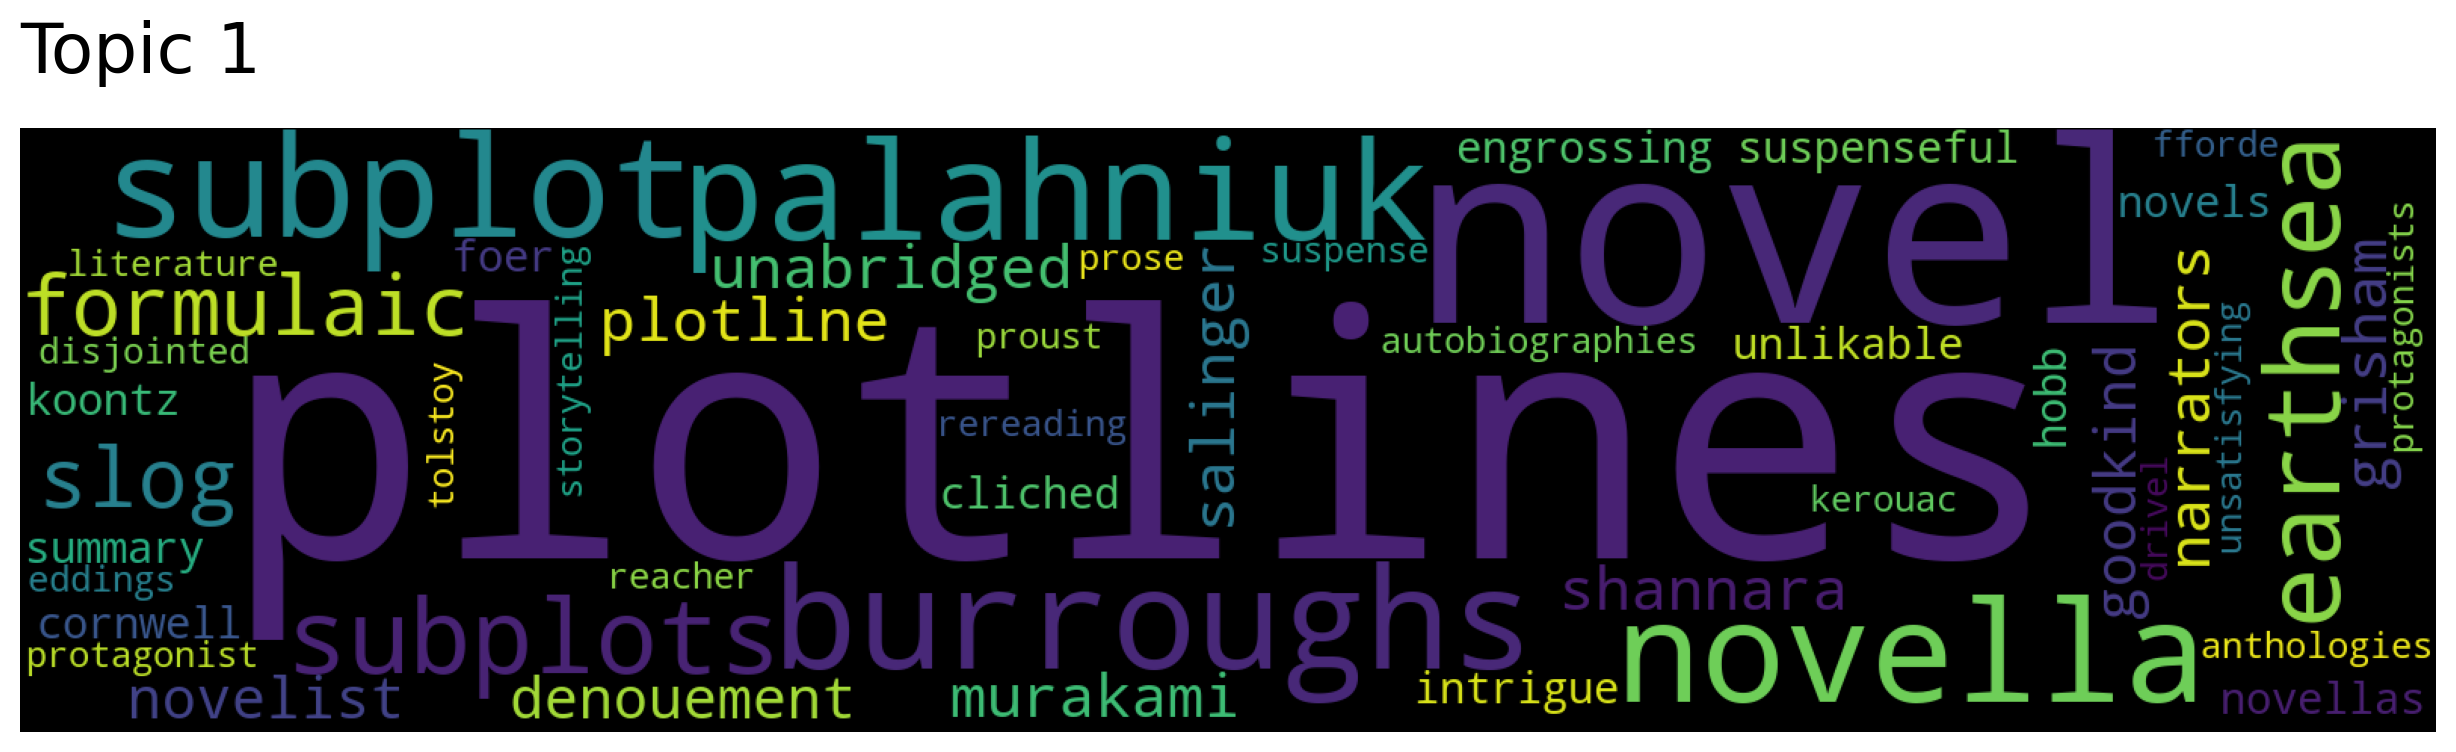

In [ ]:
model.generate_topic_wordcloud(1)


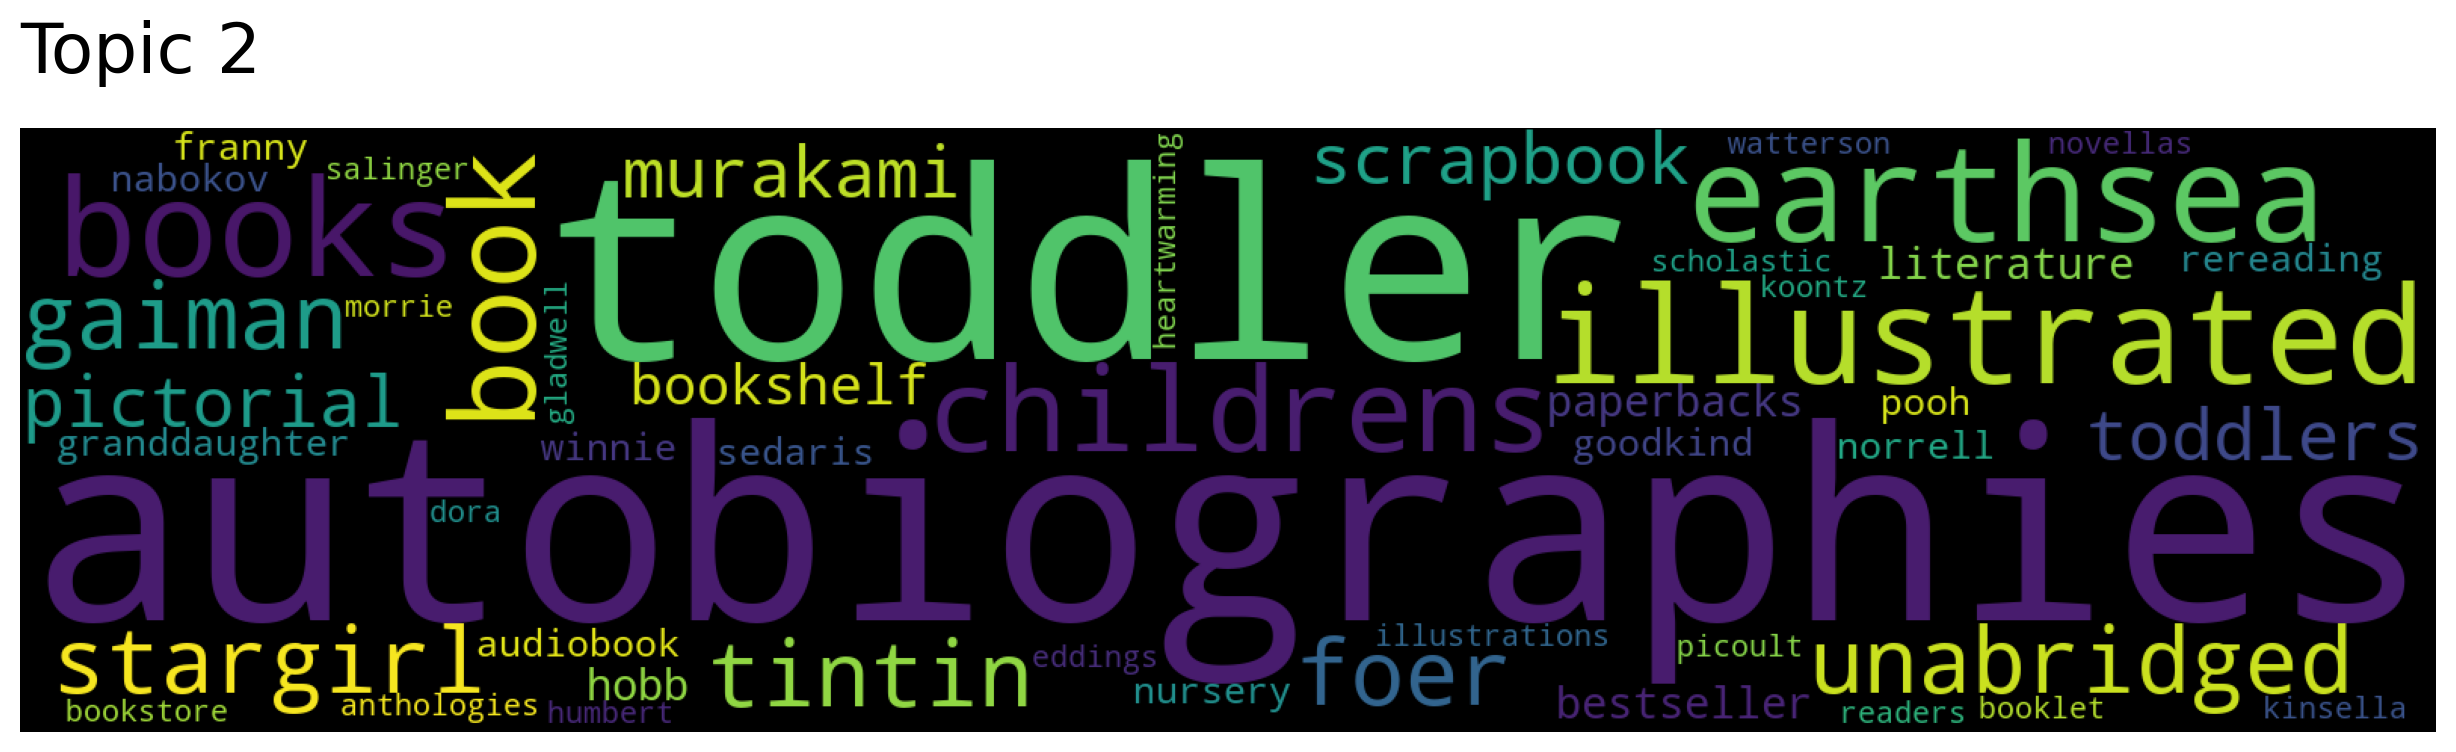

In [ ]:
model.generate_topic_wordcloud(2)


## Querying the Model

### Keyword

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["romance"], num_docs=5)
results = df_small.loc[document_ids,['product_title','star_rating','review_body']]
results.sort_values(by=['star_rating'], ascending=False)

,product_title,star_rating,review_body
2479,Veiled Promises (Zebra Debut),5,Tracy MacNish is a name to remember for future...
99653,Fool's Puzzle (Benni Harper Mystery),5,"Very good, holds your interest, just enough ro..."
81382,Chill Factor: A Novel,4,I love SB as an author. I do prefer her roman...
59852,Unconquered,4,For those of you considering reading Bertrice ...
29799,Desert Storm,4,This was the first romance novel I ever read a...


### Alternative Format 

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["romance"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    book = df_small.loc[doc_id,"product_title"]
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(f"Book : {book}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 81382, Score: 0.49731386949881745
-----------
Book : Chill Factor: A Novel
-----------
I love SB as an author.  I do prefer her romance novels, but this book did not disappoint.  It was thrilling with a bit of romance thrown in for good measure.
-----------

Document: 2479, Score: 0.44672493450041595
-----------
Book : Veiled Promises (Zebra Debut)
-----------
Tracy MacNish is a name to remember for future historical romance reads. This novel has everything a good old fashion historical romance needs. The heroine & hero are strong characters with complex circumstances and mean villians that weave into their relationship. You can't put the book down. You will have a sleepless night, so make sure you have time for this one. It is worth making the time for. So bring out the tea, put the kids to bed, and curl up with this enjoyable historical romance. What a thrill to have a new writer give us what romance fans need. A great story to not only take us back in time, but away from t

In [ ]:
model = model.save("/content/drive/MyDrive/models/book_recomm_model")

# Gensim LDA Model

## Preprocessing 


### Grammar Checker 

### Installs

In [ ]:
!pip install -q lib5c
!lib5c -v

lib5c version 0.6.1


In [ ]:
!python -m spacy download en_core_web_md
!python -m spacy link en_core_web_md en

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached en_core_web_md-2.3.1-py3-none-any.whl
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')

✘ Link 'en' already exists
To overwrite an existing link, use the --force flag



In [ ]:
!pip3 install pip==20.3

!pip3 install -U git+https://github.com/PrithivirajDamodaran/Gramformer.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 6.9 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/PrithivirajDamodaran/Gramformer.git to /tmp/pip-req-build-64ktjqh0
     |████████████████████████████████| 499 kB 6.7 MB/s 
     |████████████████████████████████| 175 kB 56.5 MB/s 
     |████████████████████████████████| 2.2 MB 42.7 MB/s 
     |████████████████████████████████| 1.3 MB 34.8 MB/s 
     |████████████████████████████████| 4.8 MB 46.1 MB/s 
     |████████████████████████████████| 208 kB 37.1 MB/s 
     |████████████████████████████████| 1.0 MB 53.5 MB/s 
     |████████████████████████████████| 7.6 MB 45.6 MB/s 
     |████████████████████████████████| 5.5

In [ ]:
!pip install gradio

### Gramformer

In [ ]:
from gramformer import Gramformer

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


In [ ]:
gf = Gramformer(models=1, use_gpu=False)

In [ ]:
from tqdm import tqdm_notebook

influent_sentences = df_small['review_body'].values

i = 0
for influent_sentence in tqdm_notebook(influent_sentences, desc= "Correcting sentences..."):
    corrected_sentences = gf.correct(influent_sentence, max_candidates=1)
    df_small.loc[i, 'review_body_corrected'] = corrected_sentences
    i=+ 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Correcting sentences...:   0%|          | 0/100000 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1104 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
import gradio as gr

app_inputs = gr.inputs.Textbox(lines=3, placeholder="Enter a grammatically incorrect sentence here...")

In [ ]:
fn = gf.correct

In [ ]:
interface = gr.Interface(fn=fn, 
                        inputs=app_inputs,
                         outputs='text', 
                        title='Hi there, I\'m Gramformer')

In [ ]:
interface.launch(share=True)

### Preprocessing (lower casing, tokenization, lemmatization etc)

In [ ]:
docs = book_reviews

docs = docs.str.lower()
docs = docs.str.split()
# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

In [ ]:
pd.DataFrame(docs[:100]).head()

,0,1,2,3,4,5,6,7,8,9,...,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311
0,this,boook,was,great,one,that,you,could,learn,from.,...,None,None,None,None,None,None,None,None,None,None
1,if,you,are,looking,for,something,to,stimulate,your,"brain,",...,None,None,None,None,None,None,None,None,None,None
2,never,read,it-a,young,relative,idicated,he,liked,it,and,...,None,None,None,None,None,None,None,None,None,None
3,though,she,is,honored,to,be,chicago,woman,of,the,...,None,None,None,None,None,None,None,None,None,None
4,review,based,on,cursory,examination,by,university,of,phoenix,students,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
"""Remove html tags from a string"""
clean = re.compile('<.*?>')
docs =  [[re.sub(clean, '', token) for token in doc] for doc in docs] 

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
pd.DataFrame(docs[:100]).head()


,0,1,2,3,4,5,6,7,8,9,...,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311
0,this,boook,wa,great,one,that,you,could,learn,from.,...,None,None,None,None,None,None,None,None,None,None
1,if,you,are,looking,for,something,to,stimulate,your,"brain,",...,None,None,None,None,None,None,None,None,None,None
2,never,read,it-a,young,relative,idicated,he,liked,it,and,...,None,None,None,None,None,None,None,None,None,None
3,though,she,is,honored,to,be,chicago,woman,of,the,...,None,None,None,None,None,None,None,None,None,None
4,review,based,on,cursory,examination,by,university,of,phoenix,student,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
from gensim.parsing.preprocessing import remove_stopwords

d = []
for idx in range(len(book_reviews.values)):
 # doc = ",".join(doc)
  doc = remove_stopwords(book_reviews.values[idx])
  d.append(doc)

docs = d
pd.DataFrame(docs[:100]).head()

,0
0,boook great learn from. teaches imponrtance fa...
1,"If looking stimulate brain, isn't it. However,..."
2,read it-a young relative idicated liked popped...
3,"Though honored Chicago Woman Year, Victoria Co..."
4,Review based cursory examination University Ph...


In [ ]:
docs = [[token for token in doc] for doc in docs]
pd.DataFrame(docs)

In [ ]:
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(book_reviews.values, min_count=20)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs.append(token)

In [ ]:
docs[0]

'boook great learn from. teaches imponrtance family values deals basic issues teens kids deal with. book 4 best friends time lives spending summer apart. day girls rooms finds pair pants tucked away closet. try realize special pants. 4 girls differnt shapes sizes pants fit them, realize pants start special. immediatley following decided certian rules abut pants write best thing u wearing pants summer right leg silly things \\\\"never pick yuor nose wearing pants.\\\\" book follows girls throuh summers differnt places world different obstacles life takes through. teach alot going imporntantly yuorself. book 4 stars reccommend slihgtest bit interested.'

In [ ]:
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(documents = docs)
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

### Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_vectorizer.strip_accents

vecd_data = tfidf_vectorizer.fit_transform(book_reviews)

## Train

In [ ]:
from gensim.models import LdaModel

# Set training parameters.
num_topics = 200
chunksize = 10000
passes = 10
iterations = 100
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

gensim_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

## Save/Load Model

In [ ]:
model.save('/content/drive/MyDrive/models/gensim_lda_model')

In [ ]:
model =  LdaModel.load('/content/drive/MyDrive/models/gensim_lda_model')


In [ ]:
model.top_topics(corpus)

NameError: ignored

# KMeans

## Preprocessing

## Training

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans
kmeans = MiniBatchKMeans(
    n_clusters=200,
)

kmeans.fit(vecd_data)

In [ ]:
pd.DataFrame(kmeans.cluster_centers_).info() 

In [ ]:
kmeans.cluster_centers_.shape

In [ ]:
labels = kmeans.labels_
labels.shape

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
X_lsa = lsa.fit_transform(vecd_data)
explained_variance = lsa[0].explained_variance_ratio_.sum()

In [ ]:
explained_variance

In [ ]:
plt.scatter(kmeans.cluster_centers_, labels)

## Performance Evaluation

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score

#km = KMeans(n_clusters=200)
c